In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import geopandas as gpd

In [2]:
enem_df = pd.read_csv(
    'MICRODADOS_ENEM_2019.csv',
    header=0,
    encoding = "ISO-8859-1",
    skiprows=lambda i: i > 0 and random.random() > 0.01,
    sep=';'
)

In [3]:
enem_df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001867767,2019,4106902,Curitiba,41,PR,19.0,F,1,1,...,A,A,B,B,A,A,C,B,B,B
1,190001493220,2019,2611606,Recife,26,PE,26.0,F,1,3,...,B,A,A,C,A,A,E,B,A,B
2,190001602630,2019,3538709,Piracicaba,35,SP,20.0,M,1,1,...,B,A,B,B,B,B,D,B,B,B
3,190001496828,2019,2604106,Caruaru,26,PE,21.0,F,1,3,...,B,A,A,B,A,A,C,A,B,B
4,190001428801,2019,2927408,Salvador,29,BA,17.0,M,1,0,...,A,A,A,C,B,A,D,A,B,B


# Colunas importantes do DataFrame:

Q006: "Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)"

O valores possíveis são grupos de A-Q com ranges de renda progressivos. Por exemplo, o grupo B respondeu que a renda mensal da sua família era de R$ 998,01 até 1.497,00.

Para simplificar a análise, agruparei esses grupos em 5. De modo que:

Grupo 0: Respondeu que a família não possui nenhuma renda

Grupo 1: Respondeu que a família possui renda entre R\\$ 998,01 e R\\$ 2.495,00 

Grupo 2: Respondeu que a família possui renda entre R\\$ 2.495,00 e R\\$ 5.988,00 

Grupo 3: Respondeu que a família possui renda entre R\\$ 5.988,00 e R\\$ 9.980,00

Grupo 4: Respondeu que a família possui renda entre R\\$ 9.980,00 e R\\$ 19.960,00 ou mais


In [50]:
def subgrupos(x):
    if x =='A':
        return 0
    if x in 'BCDE':
        return 1
    if x in 'FGHI': 
        return 2
    if x in 'JKLM': 
        return 3
    if x in 'NOPQ': 
        return 4

In [20]:
enem_df['SUBGRUPOS_Q006'] = enem_df['Q006'].apply(subgrupos)

In [68]:
income_groups = pd.DataFrame(enem_df['SUBGRUPOS_Q006'].value_counts())
income_groups['SUBGRUPOS'] = [1, 2, 0, 3, 4]
income_groups.rename({'SUBGRUPOS_Q006': 'QUANTIDADE'}, axis=1,  inplace=True)
income_groups

,QUANTIDADE,SUBGRUPOS
1,35621,1
2,8601,2
0,2439,0
3,2220,3
4,2110,4


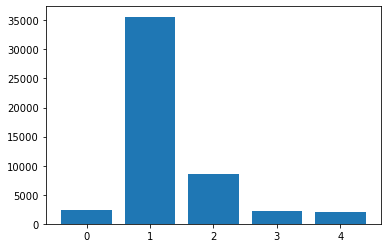

In [69]:
plt.bar(income_groups['SUBGRUPOS'], height=income_groups['QUANTIDADE'])
plt.show()